## Example plot for LFPy: Hay et al. (2011) spike waveforms
* https://github.com/LFPy/LFPy/blob/master/examples/LFPy-example-04.ipynb

In [1]:
import numpy as np
import sys
from urllib.request import urlopen
import ssl
from warnings import warn
import zipfile
import os
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import LFPy
import neuron
%matplotlib inline

--No graphics will be displayed.


In [2]:
# Fetch Hay et al. 2011 model files
if not os.path.isfile('FromModelDB/L5bPCmodelsEH/morphologies/cell1.asc'):
    #get the model files:
    u = urlopen('https://modeldb.science/download/139653',
                context=ssl._create_unverified_context())
    localFile = open('FromModelDB/L5bPCmodelsEH.zip', 'wb')
    localFile.write(u.read())
    localFile.close()
    #unzip:
    myzip = zipfile.ZipFile('FromModelDB/L5bPCmodelsEH.zip', 'r')
    myzip.extractall('FromModelDB/.')
    myzip.close()

#compile mod files every time, because of incompatibility with Mainen96 files:
if "win32" in sys.platform:
    pth = "L5bPCmodelsEH/mod/"
    warn("no autompile of NMODL (.mod) files on Windows.\n" 
         + "Run mknrndll from NEURON bash in the folder L5bPCmodelsEH/mod and rerun example script")
    if not pth in neuron.nrn_dll_loaded:
        neuron.h.nrn_load_dll(pth+"nrnmech.dll")
    neuron.nrn_dll_loaded.append(pth)
else:
    os.system('''
              cd FromModelDB/L5bPCmodelsEH/mod/
              nrnivmodl
              ''')
    neuron.load_mechanisms('FromModelDB/L5bPCmodelsEH/mod/')

/home/hyunsu/miniconda3/envs/lfpy/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set


/home/storage2/hyunsu_DATA/GitHub_Active/LFPy_practice/Examples_from_Official_LFPy/FromModelDB/L5bPCmodelsEH/mod
Mod files: "./CaDynamics_E2.mod" "./Ca_HVA.mod" "./Ca_LVAst.mod" "./epsp.mod" "./Ih.mod" "./Im.mod" "./K_Pst.mod" "./K_Tst.mod" "./Nap_Et2.mod" "./NaTa_t.mod" "./NaTs2_t.mod" "./SK_E2.mod" "./SKv3_1.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../CaDynamics_E2.mod
 -> NMODL ../Ca_HVA.mod
 -> NMODL ../Ca_LVAst.mod


Translating CaDynamics_E2.mod into /home/storage2/hyunsu_DATA/GitHub_Active/LFPy_practice/Examples_from_Official_LFPy/FromModelDB/L5bPCmodelsEH/mod/x86_64/CaDynamics_E2.c
Translating Ca_HVA.mod into /home/storage2/hyunsu_DATA/GitHub_Active/LFPy_practice/Examples_from_Official_LFPy/FromModelDB/L5bPCmodelsEH/mod/x86_64/Ca_HVA.c
Thread Safe
Translating Ca_LVAst.mod into /home/storage2/hyunsu_DATA/GitHub_Active/LFPy_practice/Examples_from_Official_LFPy/FromModelDB/L5bPCmodelsEH/mod/x86_64/Ca_LVAst.c
Thread Safe
Thread Safe
Translating epsp.mod into /home/storage2/hyunsu_DATA/GitHub_Active/LFPy_practice/Examples_from_Official_LFPy/FromModelDB/L5bPCmodelsEH/mod/x86_64/epsp.c
Translating Ih.mod into /home/storage2/hyunsu_DATA/GitHub_Active/LFPy_practice/Examples_from_Official_LFPy/FromModelDB/L5bPCmodelsEH/mod/x86_64/Ih.c
Thread Safe
Translating Im.mod into /home/storage2/hyunsu_DATA/GitHub_Active/LFPy_practice/Examples_from_Official_LFPy/FromModelDB/L5bPCmodelsEH/mod/x86_64/Im.c
Thread Safe


 -> NMODL ../epsp.mod
 -> NMODL ../Ih.mod
 -> NMODL ../Im.mod
 -> NMODL ../K_Pst.mod
 -> NMODL ../K_Tst.mod
 -> NMODL ../Nap_Et2.mod
 -> NMODL ../NaTa_t.mod
 -> NMODL ../NaTs2_t.mod
 -> NMODL ../SK_E2.mod
 -> NMODL ../SKv3_1.mod
 -> Compiling CaDynamics_E2.c
 -> Compiling Ca_HVA.c
 -> Compiling Ca_LVAst.c
 -> Compiling epsp.c
 -> Compiling Ih.c
 -> Compiling Im.c
 -> Compiling K_Pst.c
 -> Compiling K_Tst.c
 -> Compiling Nap_Et2.c
 -> Compiling NaTa_t.c
 -> Compiling NaTs2_t.c
 -> Compiling SK_E2.c
 -> Compiling SKv3_1.c
 => LINKING shared library ./libnrnmech.so
 => LINKING executable ./special LDFLAGS are:    -pthread


/home/hyunsu/miniconda3/envs/lfpy/bin/../lib/gcc/x86_64-conda-linux-gnu/12.4.0/../../../../x86_64-conda-linux-gnu/bin/ld: /home/hyunsu/miniconda3/envs/lfpy/lib/python3.12/site-packages/neuron/.data/lib/libnrniv.so: undefined reference to `memcpy@GLIBC_2.14'
collect2: error: ld returned 1 exit status
make: *** [/home/hyunsu/miniconda3/envs/lfpy/lib/python3.12/site-packages/neuron/.data/bin/nrnmech_makefile:125: special] Error 1
Traceback (most recent call last):
  File "/home/hyunsu/miniconda3/envs/lfpy/bin/nrnivmodl", line 114, in <module>
    subprocess.check_call([exe, *sys.argv[1:]])
  File "/home/hyunsu/miniconda3/envs/lfpy/lib/python3.12/subprocess.py", line 413, in check_call
    raise CalledProcessError(retcode, cmd)
subprocess.CalledProcessError: Command '['/home/hyunsu/miniconda3/envs/lfpy/lib/python3.12/site-packages/neuron/.data/bin/nrnivmodl']' returned non-zero exit status 2.


In [3]:
# define cell parameters used as input to cell-class
cellParameters = {
    'morphology'    : 'FromModelDB/L5bPCmodelsEH/morphologies/cell1.asc',
    'templatefile'  : ['FromModelDB/L5bPCmodelsEH/models/L5PCbiophys3.hoc',
                       'FromModelDB/L5bPCmodelsEH/models/L5PCtemplate.hoc'],
    'templatename'  : 'L5PCtemplate',
    'templateargs'  : 'FromModelDB/L5bPCmodelsEH/morphologies/cell1.asc',
    'passive' : False,
    'nsegs_method' : None,
    'dt' : 2**-6,
    'tstart' : -159,
    'tstop' : 10,
    'v_init' : -60,
    'celsius': 34,
    'pt3d' : True,
}

# Generate the grid in xz-plane over which we calculate local field potentials
X, Y, Z = np.mgrid[-4:5:1, 1:2, -4:5:1] * 20
# define parameters for extracellular recording electrode, using optional method
electrodeParameters = {
    'sigma' : 0.3,          # extracellular conductivity
    'x' : X.flatten(),      # x,y,z-coordinates of contacts
    'y' : Y.flatten(),
    'z' : Z.flatten(),
    'method' : 'root_as_point',  #sphere source soma segment
    'N' : np.array([[0, 1, 0]]*X.size), #surface normals
    'r' : 2.5,              # contact site radius
    'n' : 20,               # datapoints for averaging
}

In [4]:
# delete old sections from NEURON namespace
LFPy.cell.neuron.h("forall delete_section()")

# Initialize cell instance, using the LFPy.Cell class
cell = LFPy.TemplateCell(**cellParameters)
cell.set_rotation(x=4.729, y=-3.166)

# Override passive reversal potential, AP is generated
for sec in cell.allseclist:
    for seg in sec:
        seg.e_pas = -59.5

# create extracellular electrode object for LFPs on grid
electrode = LFPy.RecExtElectrode(cell=cell, **electrodeParameters)

# perform NEURON simulation
# Simulated results saved as attribute `data` in the RecExtElectrode instance
cell.simulate(probes=[electrode])

/home/storage2/hyunsu_DATA/GitHub_Active/LFPy_practice/Examples_from_Official_LFPy/example_suppl.py:287: SyntaxWarning: invalid escape sequence '\m'
  ax1.text(60, 102, '20 $\mu$m')


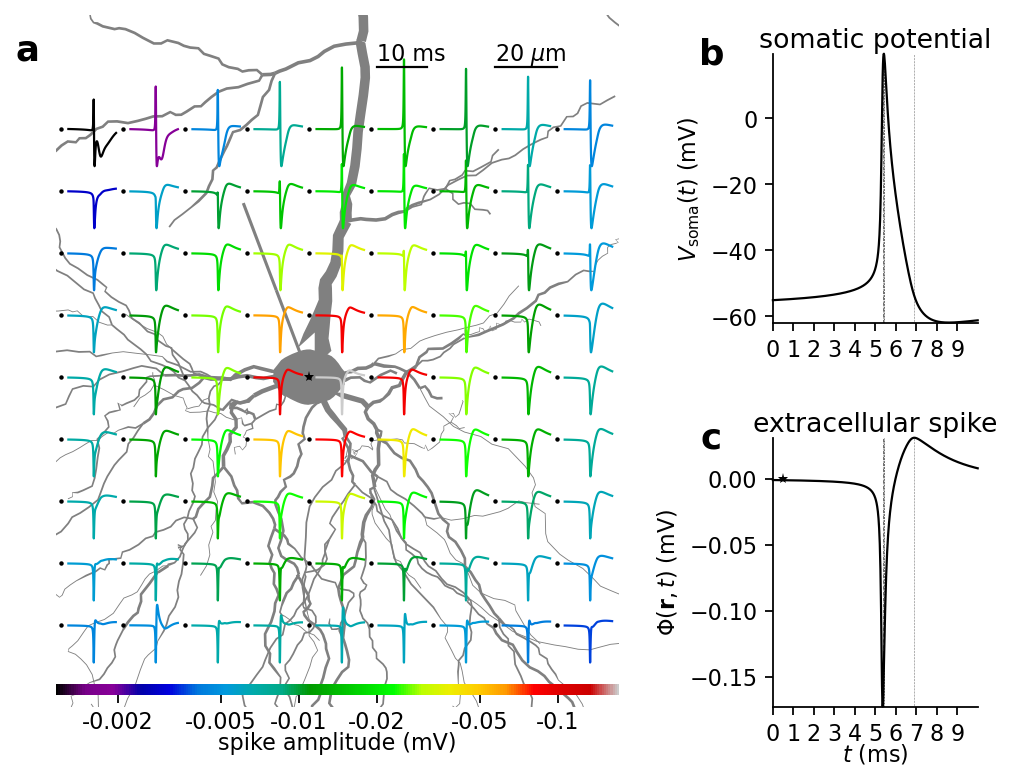

In [5]:
from example_suppl import plotstuff
fig = plotstuff(cell, electrode)
